In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
SMmax = 120 # Almacenamiento máximo del suelo

T = [13.6, 14.2, 14.4, 14.5, 14.4, 14, 14, 13.9, 14, 14, 13.8, 13.7]
n = [31, 28.5, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
l = [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
P = [26.8, 50.2, 114, 148.9, 109.9, 38.3, 45.1, 37.2, 53, 105.6, 117.2, 58.5]

## Funciones

In [49]:
def thornthwaite(T, n, l):
    # PET en mm/mes
    T = [i if i > 0 else 0 for i in T]
    I = sum([(T_i/5)**1.514 for T_i in T])
    a = 6.75e-7 * I ** 3 - 7.71e-5 * I ** 2 + 1.79e-2 * I + 0.49
    PET = [16 * (n_i / 30) * (l_i / 12) * (10 * T_i/I) ** a for n_i, l_i, T_i in zip(n, l, T)]
    return PET

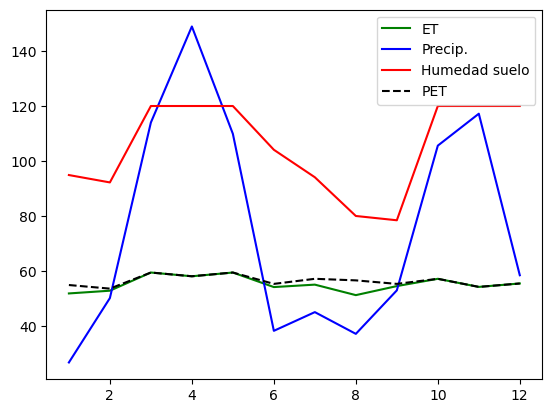

In [51]:
PET = thornthwaite(T, n, l)

SM0 = 0
error = 1
tol = 1e-6

while error > tol:
    SM_ini = SM0
    ET = SM = []
    for PET_i, P_i in zip(PET, P):
        if PET_i <= P_i:
            ET_i = PET_i
            SM_i = min((P_i - ET_i) + SM_ini, SMmax)
        else:
            dSM = SM_ini * (1 - np.exp(-(PET_i - P_i)/SMmax))
            ET_i = P_i + dSM
            SM_i = SM_ini - dSM
        SM_ini = SM_i
        
        ET = ET + [ET_i]
        SM = SM + [SM_i]
    
    error = abs(SM0 - SM_ini)
    SM0 = SM_ini
    
# Gráfica
t = range(1, 13)
plt.plot(t, ET, 'g-', label = 'ET')
plt.plot(t, P, 'b-', label = 'Precip.')
plt.plot(t, SM, 'r-', label = 'Humedad suelo')
plt.plot(t, PET, 'k--', label = 'PET')
plt.legend(loc='upper right')

plt.show()